## Housing Tenure Prediction Analysis

### Libraries requires for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, cm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from ISLP import load_data, confusion_table
from ISLP.svm import plot as plot_svm
from sklearn.inspection import permutation_importance

### Loading the 'Housing Data'

In [2]:
Housing_Data = pd.read_csv("Housing.csv")
Housing_Data

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
0,1371772,920.0,1,13,9990,9993,360,9993,75000,700000,...,1,0,1,14,52,6,1969,7,71,75000
1,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,1,83,22,6,1999,10,101,5600
2,1371773,3640.9,2,22,1080,9993,1800,9993,13600,9999999,...,2,0,2,106,22,6,1999,7,71,8000
3,1371774,22.5,1,13,600,9993,9993,9993,7000,800000,...,1,0,1,33,62,4,1959,6,63,7000
4,1371775,3710.4,2,22,3600,9993,9997,9993,50500,9999999,...,1,0,1,297,50,3,1971,7,71,16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75383,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,1,229,30,1,1991,6,63,35000
75384,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,2,331,30,1,1991,6,64,50000
75385,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,3,331,5,6,2016,0,2,9999999
75386,1402573,2754.9,2,22,9990,7200,960,9993,86700,9999999,...,1,2,4,157,64,1,1957,6,63,1700


In [3]:
# Now let's see the columns in our data set
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75388 entries, 0 to 75387
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SERIAL     75388 non-null  int64  
 1   DENSITY    75388 non-null  float64
 2   OWNERSHP   75388 non-null  int64  
 3   OWNERSHPD  75388 non-null  int64  
 4   COSTELEC   75388 non-null  int64  
 5   COSTGAS    75388 non-null  int64  
 6   COSTWATR   75388 non-null  int64  
 7   COSTFUEL   75388 non-null  int64  
 8   HHINCOME   75388 non-null  int64  
 9   VALUEH     75388 non-null  int64  
 10  ROOMS      75388 non-null  int64  
 11  BUILTYR2   75388 non-null  int64  
 12  BEDROOMS   75388 non-null  int64  
 13  VEHICLES   75388 non-null  int64  
 14  NFAMS      75388 non-null  int64  
 15  NCOUPLES   75388 non-null  int64  
 16  PERNUM     75388 non-null  int64  
 17  PERWT      75388 non-null  int64  
 18  AGE        75388 non-null  int64  
 19  MARST      75388 non-null  int64  
 20  BIRTHY

In [4]:
# Let's check the shape of our dataset
Housing_Data.shape

(75388, 24)

In [5]:
# Lets calculate the summary statistics for our dataset for imputation 
Housing_Data.describe()

,SERIAL,DENSITY,OWNERSHP,OWNERSHPD,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,...,NFAMS,NCOUPLES,PERNUM,PERWT,AGE,MARST,BIRTHYR,EDUC,EDUCD,INCTOT
count,7.538800e+04,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,7.538800e+04,7.538800e+04,...,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,75388.000000,7.538800e+04
mean,1.387234e+06,2423.430017,1.266050,15.152146,2155.588184,6532.804850,3282.154680,9132.200363,1.325857e+05,3.115290e+06,...,1.120138,0.772722,2.133072,100.746644,41.737040,3.466599,1979.262960,6.553802,67.954754,1.741325e+06
std,8.903828e+03,2526.581859,0.441894,4.114694,1918.598151,4379.021441,3968.876334,2704.300467,1.300609e+05,4.178808e+06,...,0.520437,0.466072,1.347956,79.428151,23.497059,2.323782,23.497059,3.368158,33.507170,3.730804e+06
min,1.371772e+06,22.500000,1.000000,12.000000,48.000000,48.000000,4.000000,4.000000,-7.100000e+03,1.000000e+03,...,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1928.000000,0.000000,1.000000,-8.700000e+03
25%,1.379509e+06,448.200000,1.000000,13.000000,1080.000000,1200.000000,500.000000,9993.000000,5.500000e+04,4.000000e+05,...,1.000000,1.000000,1.000000,54.000000,22.000000,1.000000,1960.000000,6.000000,61.000000,1.560000e+04
50%,1.387292e+06,1667.900000,1.000000,13.000000,1680.000000,9992.000000,1200.000000,9993.000000,1.000000e+05,6.500000e+05,...,1.000000,1.000000,2.000000,80.000000,42.000000,4.000000,1979.000000,7.000000,71.000000,4.800000e+04
75%,1.394971e+06,3843.300000,2.000000,22.000000,2400.000000,9993.000000,9993.000000,9993.000000,1.640000e+05,9.999999e+06,...,1.000000,1.000000,3.000000,117.000000,61.000000,6.000000,1999.000000,10.000000,101.000000,1.250000e+05
max,1.402573e+06,13284.600000,2.000000,22.000000,9997.000000,9997.000000,9997.000000,9997.000000,1.674500e+06,9.999999e+06,...,13.000000,3.000000,16.000000,1113.000000,93.000000,6.000000,2021.000000,11.000000,116.000000,9.999999e+06


### Data Cleaning and Preprocessing

For our analysis, we will be looking for owners/renters whose age falls between the range 18 years to 80 years

In [6]:
# So, lets filter our data accordingly to condition
Housing_Data = Housing_Data[(Housing_Data['AGE'] >= 18) & (Housing_Data['AGE'] <= 80)]

After that, We will be considering the education of owners/renters to who have education attainment from 12th grade to 5+ years of college. There are some missing values in our data (code 99 means missing). So handling that and also getting rid of the column 'EDUCD' which means education attainment [detailed version] to handle redundancy.

In [7]:
# Filtering the data accordingly
Housing_Data = Housing_Data[(Housing_Data['EDUC'] >= 6) & (Housing_Data['EDUC'] <= 11) & Housing_Data['EDUC'] != 99]

# Removing the 'EDUCD' column
Housing_Data.drop('EDUCD', axis=1, inplace=True)

In [8]:
# Removing the 'DENSITY' column
Housing_Data.drop('DENSITY', axis=1, inplace=True)

In [9]:
# Looking for properties built from the year 2000 to 2021
# So, Filtering our datase accordingly
Housing_Data = Housing_Data[(Housing_Data['BUILTYR2'] >= 9) & (Housing_Data['BUILTYR2'] <= 26)]

In [10]:
# Removing the 'PERWT' column
Housing_Data.drop('PERWT', axis=1, inplace=True)

In [11]:
# Removing the 'BIRTHYR' column
Housing_Data.drop('BIRTHYR', axis=1, inplace=True)

In [12]:
# Removing the 'OWNERSHPD' column
Housing_Data.drop('OWNERSHPD', axis=1, inplace=True)

In [13]:
# Removing the 'INCTOT' column
Housing_Data.drop('INCTOT', axis=1, inplace=True)

In [14]:
# Removing the 'NFAMS' column
Housing_Data.drop('NFAMS', axis=1, inplace=True)

In [15]:
# Removing the 'NCOUPLES' column
Housing_Data.drop('NCOUPLES', axis=1, inplace=True)

In [16]:
# REmoving the 'PERNUM' column
Housing_Data.drop('PERNUM', axis=1, inplace=True)

In [17]:
Housing_Data.head(10)

,SERIAL,OWNERSHP,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,ROOMS,BUILTYR2,BEDROOMS,VEHICLES,AGE,MARST,EDUC
20,1371783,1,1920,1440,50,9993,30000,15000,3,15,3,4,40,6,6
21,1371783,1,1920,1440,50,9993,30000,15000,3,15,3,4,32,6,6
32,1371786,2,1800,9993,1400,9993,62000,9999999,4,9,3,2,28,6,11
33,1371786,2,1800,9993,1400,9993,62000,9999999,4,9,3,2,26,6,10
34,1371787,1,960,360,5000,9993,507500,5279000,10,15,6,2,37,1,10
35,1371787,1,960,360,5000,9993,507500,5279000,10,15,6,2,36,1,10
38,1371788,1,1200,9997,110,9993,115600,375000,5,9,4,2,71,1,10
39,1371788,1,1200,9997,110,9993,115600,375000,5,9,4,2,71,1,7
79,1371802,1,1560,9993,9993,9993,12000,550000,7,15,4,2,67,5,10
81,1371803,2,3600,9993,9993,9993,45800,9999999,9,9,5,2,44,4,6


In [18]:
# Group by 'SERIAL' and aggregating the data
# Serial number of household members are associated with different variables so grouping them with it
Housing_Data = Housing_Data.groupby('SERIAL').agg({
    'OWNERSHP': 'first',
    'COSTELEC': 'first',
    'COSTGAS': 'first',
    'COSTWATR': 'first',
    'COSTFUEL': 'first',
    'HHINCOME': 'first',
    'VALUEH': 'first',
    'ROOMS': 'first',
    'BUILTYR2': 'first',
    'BEDROOMS': 'first',
    'VEHICLES': 'first',      
    'MARST': 'first',
    'AGE' : 'max',   # Taking the highest age of household member assuming that he is earning the highest among the others
    'EDUC': 'max'    # Highest education attainment of that household member 
}).reset_index()

In [19]:
# Final housing data set after cleaning and prefrocessing
Housing_Data.head(10)

,SERIAL,OWNERSHP,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,HHINCOME,VALUEH,ROOMS,BUILTYR2,BEDROOMS,VEHICLES,MARST,AGE,EDUC
0,1371783,1,1920,1440,50,9993,30000,15000,3,15,3,4,6,40,6
1,1371786,2,1800,9993,1400,9993,62000,9999999,4,9,3,2,6,28,11
2,1371787,1,960,360,5000,9993,507500,5279000,10,15,6,2,1,37,10
3,1371788,1,1200,9997,110,9993,115600,375000,5,9,4,2,1,71,10
4,1371802,1,1560,9993,9993,9993,12000,550000,7,15,4,2,5,67,10
5,1371803,2,3600,9993,9993,9993,45800,9999999,9,9,5,2,4,60,7
6,1371804,1,2400,1800,40,9993,775000,950000,8,9,5,3,1,51,11
7,1371807,1,1320,360,2200,50,95500,285000,6,9,4,2,1,80,10
8,1371810,1,1800,1200,1800,9993,172500,950000,9,9,6,2,1,41,10
9,1371811,1,480,600,110,9993,84000,750000,6,25,4,2,1,35,7


### Encoding the categorical variables 

In [20]:
# Converting 'MARST' and 'EDUC' to categorical using the label-Encoder
le = LabelEncoder()
Housing_Data['MARST'] = le.fit_transform(Housing_Data['MARST'])
Housing_Data['EDUC'] = le.fit_transform(Housing_Data['EDUC'])

In [21]:
# Scaling our data to improve the perfomance of models
# We will be using standard scaler function
scaler = StandardScaler()

# This will not consider ownership as one of the feature
# Also, it is our target variable
features = Housing_Data.columns.difference(['OWNERSHP']) 

# Fit the scaler to your data
Housing_Data[features] = scaler.fit_transform(Housing_Data[features])

### Splitting the dataset into Training and Testing set

In [22]:
# Splitting the dataset (70 - 30 ratio)
Housing_train_set, Housing_test_set = train_test_split(Housing_Data, test_size = 0.3, random_state = 1)

### Models

- SVM Model with linear kernel

In [23]:
# Support Vector Machine model with linear kernel and using cost value = 1
# I used max_iterations as the model was taking time to execute
svm_linear_model = svm.SVC(kernel = 'linear', C = 1, max_iter = 10000) 
svm_linear_model.fit(Housing_train_set[['AGE', 'HHINCOME']], Housing_train_set['OWNERSHP'])

SVC(C=1, kernel='linear', max_iter=10000)

In [24]:
# Predicting the ownership status on the test set
lin_model_predicts = svm_linear_model.predict(Housing_test_set[['AGE', 'HHINCOME']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], lin_model_predicts))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], lin_model_predicts), 4))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85      1631
           2       0.68      0.49      0.57       723

    accuracy                           0.77      2354
   macro avg       0.74      0.69      0.71      2354
weighted avg       0.76      0.77      0.76      2354

Accuracy: 0.7727


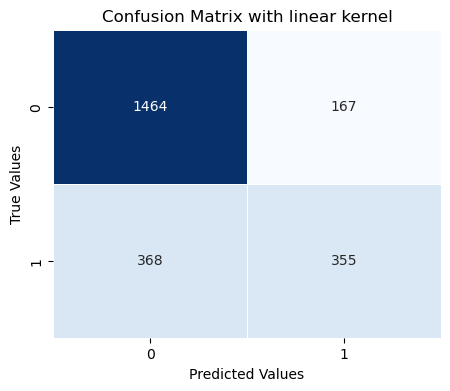

In [25]:
# Lets construct a confusion matrix for our predictions
linear_matrix = confusion_matrix(Housing_test_set['OWNERSHP'], lin_model_predicts)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(linear_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with linear kernel')
plt.show()

So, with the linear kernel and default cost value, our model was poorly performing with the accuracy around 72.38%. 

Now, we apply cross validation using skm.GridSearchCV() to select the best C value for our SVM model with a linear kernel.

In [26]:
# Defining the KFold cross-validation for 5 folds
kfold = skm.KFold(5, random_state = 1, shuffle=True)

# Let's set up a grid for our cost value 
c_values = {'C':[0.01, 0.1, 1, 10, 100]}

# Lets apply 5 fold cross validation using GridSearchCV() to get the best c-value for our model
# we will be using the above model for cross-validation
grid = skm.GridSearchCV(svm_linear_model, c_values, cv = kfold, scoring = 'accuracy');

# refitting the model after cross-validation
grid.fit(Housing_train_set[['AGE', 'HHINCOME']], Housing_train_set['OWNERSHP'])
grid.best_params_

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver

{'C': 0.01}

Now, lets refit the model with this c-value and check if ourt accuracy has been improved or not.

In [27]:
best_linear_model = grid.best_estimator_

# Predicting the ownership status on the test set
lin_model_predictsCV = best_linear_model.predict(Housing_test_set[['AGE', 'HHINCOME']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], lin_model_predictsCV))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], lin_model_predictsCV), 4))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85      1631
           2       0.69      0.49      0.57       723

    accuracy                           0.78      2354
   macro avg       0.75      0.70      0.71      2354
weighted avg       0.77      0.78      0.76      2354

Accuracy: 0.7761


So after cross-validation, the SVM linear kernel model with best cost value of 100 slighty decreased the accuracy around 72.25%. 

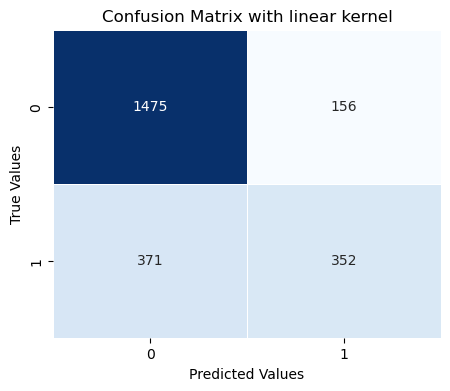

In [28]:
# Lets construct a confusion matrix for our predictions
linear_matrixCV = confusion_matrix(Housing_test_set['OWNERSHP'], lin_model_predictsCV)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(linear_matrixCV, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with linear kernel')
plt.show()

Let's construct a plot to get the decision boundry about the ownership based on age and total household income

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


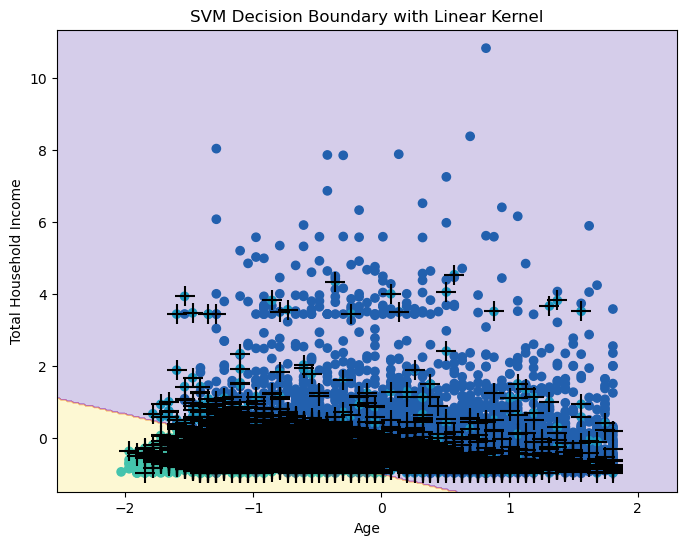

In [29]:
# Extracting the features values (Age and total house income values) and target variable (ownership values) used in the SVM
X_train = Housing_train_set[['AGE', 'HHINCOME']].values
y_train = Housing_train_set['OWNERSHP'].values

fig, ax = subplots(figsize=(8,6))
plot_svm(X_train,
         y_train,
         best_linear_model,
         ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Total Household Income')
ax.set_title('SVM Decision Boundary with Linear Kernel')
plt.show()

- SVM Model with polynomial kernel

In [30]:
# Support Vector Machine model with polynomial kernel and using cost value = 1 and degree = 2
svm_poly_model = svm.SVC(kernel = 'poly', C = 1, degree = 2, max_iter = 10000) 
svm_poly_model.fit(Housing_train_set[['AGE', 'MARST','HHINCOME']], Housing_train_set['OWNERSHP'])

SVC(C=1, degree=2, kernel='poly', max_iter=10000)

In [31]:
# Predicting the ownership status on the test set
poly_model_predicts = svm_poly_model.predict(Housing_test_set[['AGE', 'MARST', 'HHINCOME']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], poly_model_predicts))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], poly_model_predicts), 4))

              precision    recall  f1-score   support

           1       0.78      0.90      0.83      1631
           2       0.65      0.43      0.52       723

    accuracy                           0.75      2354
   macro avg       0.71      0.66      0.67      2354
weighted avg       0.74      0.75      0.74      2354

Accuracy: 0.7528


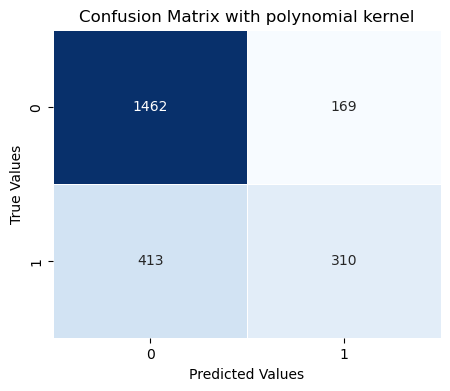

In [32]:
# Lets construct a confusion matrix for our predictions
poly_matrix = confusion_matrix(Housing_test_set['OWNERSHP'], poly_model_predicts)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(poly_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with polynomial kernel')
plt.show()

In [33]:
# Defining the KFold cross-validation for 5 folds
kfold = skm.KFold(5, random_state = 1, shuffle=True)

# Let's set up a grid for our cost value and degree values
para_values = {'C':[0.01, 0.1, 1, 10, 100], 'degree':[2,3,4,5]}

# Lets apply 5 fold cross validation using GridSearchCV() to get the best c-value for our model
# we will be using the above model for cross-validation
grid = skm.GridSearchCV(svm_poly_model, para_values, cv = kfold, scoring = 'accuracy');

# refitting the model after cross-validation
grid.fit(Housing_train_set[['AGE', 'MARST', 'HHINCOME']], Housing_train_set['OWNERSHP'])
grid.best_params_

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver

{'C': 0.1, 'degree': 5}

In [34]:
# Support Vector Machine model with polynomial kernel and using cost value = 0.1 and degree = 5 after cross validation
svm_poly_modelCV = svm.SVC(kernel = 'poly', C = 0.1, degree = 5, max_iter = 10000) 
svm_poly_modelCV.fit(Housing_train_set[['AGE', 'MARST','HHINCOME']], Housing_train_set['OWNERSHP'])

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, degree=5, kernel='poly', max_iter=10000)

In [35]:
# Predicting the ownership status on the test set
poly_model_predictsCV = svm_poly_modelCV.predict(Housing_test_set[['AGE', 'MARST', 'HHINCOME']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], poly_model_predictsCV))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], poly_model_predictsCV), 4))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85      1631
           2       0.73      0.40      0.52       723

    accuracy                           0.77      2354
   macro avg       0.76      0.67      0.68      2354
weighted avg       0.76      0.77      0.75      2354

Accuracy: 0.771


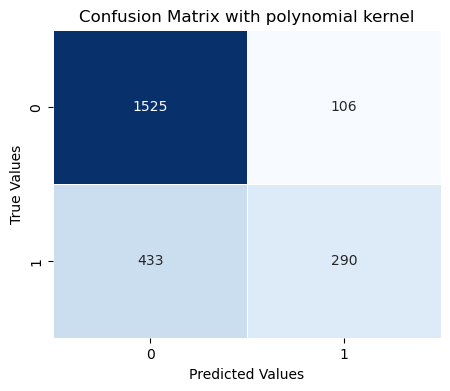

In [36]:
# Lets construct a confusion matrix for our predictions
poly_matrixCV = confusion_matrix(Housing_test_set['OWNERSHP'], poly_model_predictsCV)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(poly_matrixCV, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with polynomial kernel')
plt.show()

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


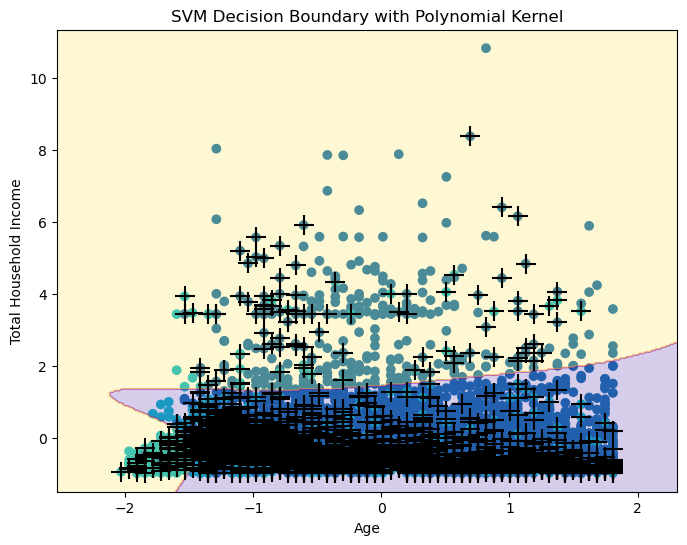

In [37]:
# Decision Boundary Plot for polynomial kernel

# Assuming a mode value for the MARST (marital status) 
mode_MARST = Housing_train_set['MARST'].mode()  

# Creating a meshgrid for plotting based on the mode values from MARST variable
X = np.c_[X_train[:, :2], np.full(len(X_train), fill_value=mode_MARST)]

# Plotting the decision boundary graph
fig, ax = plt.subplots(figsize=(8, 6))
plot_svm(X, y_train, svm_poly_modelCV, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Total Household Income')
ax.set_title('SVM Decision Boundary with Polynomial Kernel')
plt.show()

- SVM Model with radial basis function (rbf) kernel

In [38]:
# Support Vector Machine model with rbf kernel and using cost value = 1 and degree = 2 and gamma = 1
svm_rbf_model = svm.SVC(kernel = 'rbf', C = 1, degree = 2, gamma = 1, max_iter = 10000) 
svm_rbf_model.fit(Housing_train_set[['AGE','HHINCOME', 'COSTWATR','COSTELEC','EDUC']], Housing_train_set['OWNERSHP'])

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, degree=2, gamma=1, max_iter=10000)

In [39]:
# Predicting the ownership status on the test set
rbf_model_predicts = svm_rbf_model.predict(Housing_test_set[['AGE', 'HHINCOME', 'COSTWATR','COSTELEC','EDUC']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], rbf_model_predicts))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], rbf_model_predicts), 4))

              precision    recall  f1-score   support

           1       0.82      0.92      0.87      1631
           2       0.76      0.55      0.64       723

    accuracy                           0.81      2354
   macro avg       0.79      0.74      0.75      2354
weighted avg       0.80      0.81      0.80      2354

Accuracy: 0.808


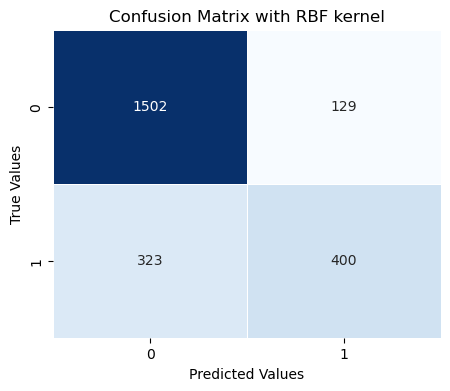

In [40]:
# Lets construct a confusion matrix for our predictions
rbf_matrix = confusion_matrix(Housing_test_set['OWNERSHP'], rbf_model_predicts)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(rbf_matrix, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with RBF kernel')
plt.show()

In [41]:
# Defining the KFold cross-validation for 5 folds
kfold = skm.KFold(5, random_state = 1, shuffle=True)

# Let's set up a grid for our cost value and degree values
para_values = {'C':[0.01, 0.1, 1, 10, 100], 'degree':[3,4,5], 'gamma':[3,4]}

# Lets apply 5 fold cross validation using GridSearchCV() to get the best c-value for our model
# we will be using the above model for cross-validation
grid = skm.GridSearchCV(svm_rbf_model, para_values, cv = kfold, scoring = 'accuracy');

# refitting the model after cross-validation
grid.fit(Housing_train_set[['AGE', 'HHINCOME', 'COSTELEC', 'COSTWATR', 'EDUC']], Housing_train_set['OWNERSHP'])
grid.best_params_

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver

{'C': 1, 'degree': 3, 'gamma': 3}

In [42]:
# Support Vector Machine model with rbf kernel and using cost value = 1 and degree = 3 and gamma = 3 after cross validation
svm_rbf_modelCV = svm.SVC(kernel = 'rbf', C = 1, degree = 3, gamma = 3, max_iter = 10000) 
svm_rbf_modelCV.fit(Housing_train_set[['AGE','HHINCOME', 'COSTELEC', 'COSTWATR', 'EDUC']], Housing_train_set['OWNERSHP'])

SVC(C=1, gamma=3, max_iter=10000)

In [43]:
# Predicting the ownership status on the test set
rbf_model_predictsCV = svm_rbf_modelCV.predict(Housing_test_set[['AGE', 'HHINCOME', 'COSTELEC', 'COSTWATR','EDUC']])

# Evaluating the model
print(classification_report(Housing_test_set['OWNERSHP'], rbf_model_predictsCV))
print("Accuracy:", round(accuracy_score(Housing_test_set['OWNERSHP'], rbf_model_predictsCV), 4))

              precision    recall  f1-score   support

           1       0.82      0.92      0.87      1631
           2       0.75      0.55      0.63       723

    accuracy                           0.81      2354
   macro avg       0.79      0.73      0.75      2354
weighted avg       0.80      0.81      0.80      2354

Accuracy: 0.8059


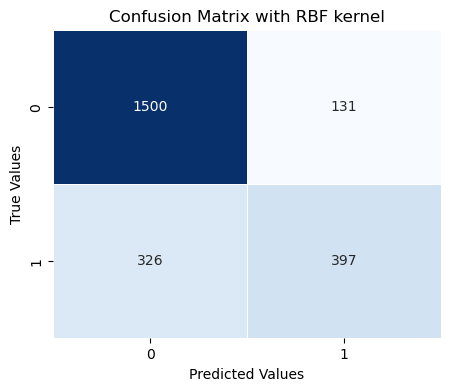

In [44]:
# Lets construct a confusion matrix for our predictions
rbf_matrixCV = confusion_matrix(Housing_test_set['OWNERSHP'], rbf_model_predictsCV)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(rbf_matrixCV, annot=True, fmt="d", linewidths=.5, cmap="Blues", cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix with RBF kernel')
plt.show()

C:\Users\hirshikesh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


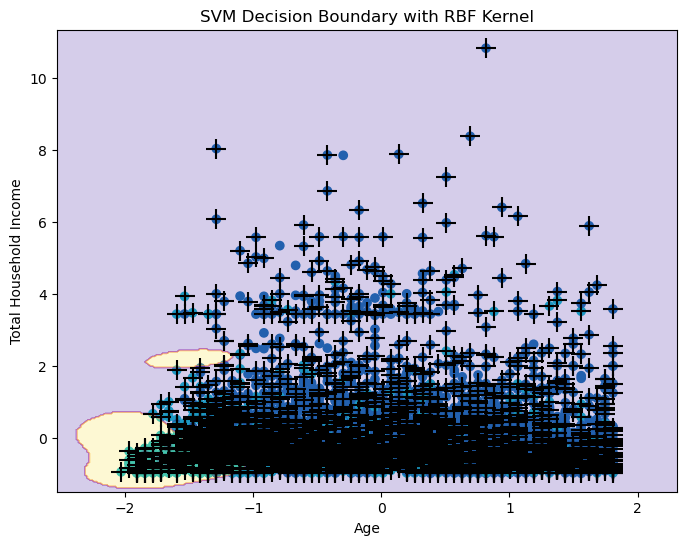

In [45]:
# Decision Boundary Plot for rbf kernel

# Selecting median values for COSTWATR and COSTELEC to make them constant values for the sake of the graph
median_COSTELEC = Housing_train_set['COSTELEC'].median()
median_COSTWATR = Housing_train_set['COSTWATR'].median()

# gettting the mode for EDUC as it is a categorical variable to make it constant as well
mode_EDUC = Housing_train_set['EDUC'].mode()[0]  

# Creating the feature grid for the fixed values
X = np.c_[X_train[:, 0:2], 
               np.full(len(X_train), fill_value = median_COSTELEC),
               np.full(len(X_train), fill_value = median_COSTWATR),
               np.full(len(X_train), fill_value = mode_EDUC)]

# plotting the decision boundary graph for rbf kernel
fig, ax = plt.subplots(figsize=(8, 6))
plot_svm(X, y_train, svm_rbf_modelCV, ax=ax)  
ax.set_xlabel('Age')
ax.set_ylabel('Total Household Income')
ax.set_title('SVM Decision Boundary with RBF Kernel')
plt.show()

## Getting the Strong Predictors

In [46]:
# Computing the permutation importance for SVM models on the selected features
# permutation importance is used in observing the impact on model performance for any SVM models with different kernels
# As our rbf model got the best accuracy, we will get the importance on this model
# We will be using permutation_importance() function from the sklearn inspections library
results = permutation_importance(svm_rbf_modelCV, Housing_test_set[['AGE', 'HHINCOME', 'COSTELEC', 'COSTWATR', 'EDUC']], Housing_test_set['OWNERSHP'], n_repeats=10)

# Getting the feature names
names = ['Age of Household Member', 'Total Household Income', 'Cost of Electricity', 'Cost of Water', 'Education Attainment']

# Now putting the results into a DataFrame and sorting them in descending order
imp_df = pd.DataFrame({'Feature': names, 'Importance': results.importances_mean})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

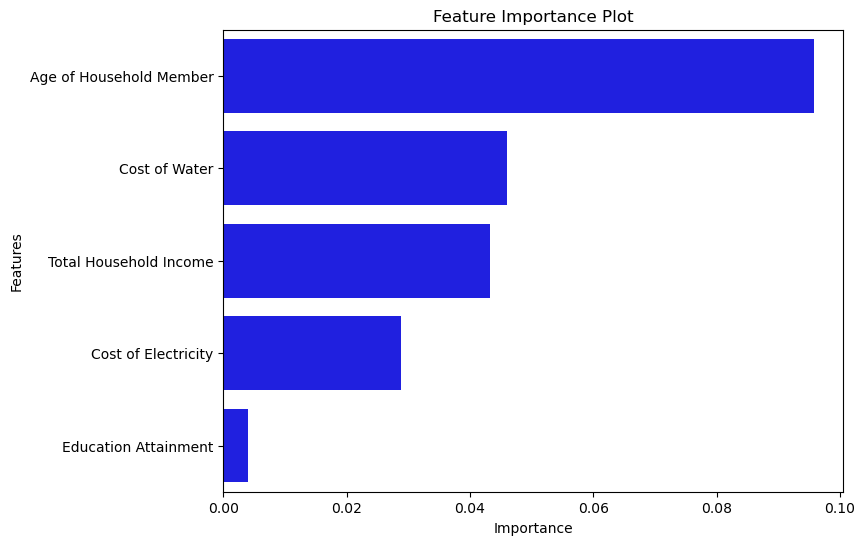

In [47]:
# Feature Importance Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df, color='blue')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## References

1) Ch9-1 and Ch9-2 python files
2) lecture notes
3) Python Documentation on scikit learn and other functions
    - https://scikit-learn.org/stable/modules/svm.html
    - https://scikit-learn.org/stable/user_guide.html